## ATU -Programming for Data Analysis, Winter 2023/24
## Project 1
##### Author: Norbert Antal

## **Salary_Base_data**

This project aims to create a synthetic dataset of at least 4 different variables that is simulating the real-world phenomenon of salaries of employees at a company.

The sample data shows what everyone at the company is getting paid. Each row is a different person, and the columns have info such as age, gender, education, job title, experience, and salary.


### Loading modules

Some essential Python libraries are required for this project; Pandas for data manipulation, Matplotlib and Seaborn for data visualisation and NumPy for numerical operations.

In [1]:
# loading required python modules
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Obtaining data

For sourcing real-world data, Kaggle.com was a valuable resource. Kaggle is a platform *"to learn data science and build a portfolio"*, providing access to large number of diverse datasets relevant to various domains.
The *Salary_Base_data* dataset was chosen as a sample because it addresses a subject that could prove valuable for examination, especially for those interested in contributing to future projects related to wages, bonus schemes, or other HR related topics.<br>
As we can't control the source file, to avoid possible issues with changing URLs or changes in the contents of the file, the dataset was manually downloaded in .csv format (*Salary_Data.csv*) and copied into the "Datasets" folder within the Projects root folder.

###### sample dataset: Salary_Base_data (ref: https://www.kaggle.com/datasets/sinhasatwik/salary-base-data/data)

### Load and check data, initial overview

+ The salary dataset is read from the previously downloaded CSV file (*Salary_Data.csv*) into a Pandas DataFrame.<br>
  
+ After checking the datatypes, we find that the dataset contains three float64 or floating point type numeric variables and three object type variables which is indication that the data in those variables are either textual or mixed.<br>
+ For checking the dataframe structure the first 5 rows of the dataframe is displayed which provides more context and appears to be in line with the dataset description provided by the source.
    - Age: Numeric values representing the age of each employee in years.
    - Gender: Categorical values indicating the gender of each employee as either male or female.
    - Education Level: Categorical values reflecting the educational level of each employee.
    - Job Title: Categorical values specifying the job title of each employee.
    - Years of Experience: Numeric values denoting the number of years of work experience for each employee.
    - Salary: Numeric values representing the annual salary of each employee in US dollars, influenced by factors like job title, years of experience, and education level.


**Errors:** A small number of entries were missing data. These have been removed as empty cells can potentially give wrong result when data is being analysed.



###### Check for NaN in Pandas DataFrame (ref: https://datatofish.com/check-nan-pandas-dataframe/)<br>Pandas - Cleaning Empty Cells (ref: https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp)

In [2]:
# Load data
df=pd.read_csv('Datasets/Salary_Data.csv')

In [3]:
# check data types and sctructure
print(df.dtypes) # check data types
df.head() # check structure

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
# check for errors
print("Errors: missing entries")
print(df.isnull().sum()) # check for Null entries (absence of value)
df[df.isnull().any(axis=1)] # check rows with missing data
#ref:  https://datatofish.com/check-nan-pandas-dataframe/

Errors: missing entries
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [5]:
#remove rows with empty cells
df=df.dropna() # drop rows with missing data # ref: https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp
# check result
print(df.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [6]:
# Additional error handling
#during generating pairs plot, found text value 'PhD' misspelled as 'phD' in the 'Education Level' variable adding a redundant cathegory.
df['Education Level'].unique() # verify unique categories in the column in question and found multiple redundant categories
# Consolidate redundant categories
df["Education Level"] = df["Education Level"].replace(
    ["Bachelor's", "Master's", "phD"], #to replace
    ["Bachelor's Degree", "Master's Degree", "PhD"]) #replaced to

# How to Replace Values in Pandas DataFrame (ref:https://datatofish.com/replace-values-pandas-dataframe/)

In [7]:
df['Education Level'].unique()

array(["Bachelor's Degree", "Master's Degree", 'PhD', 'High School'],
      dtype=object)

### Analysis of the varaibles

- Age: The dataset includes 6698 individuals with an average age of approximately 33.62 years. Ages range from 21 to 62. The majority of individuals fall between 28 and 38 years old, as indicated by the interquartile range.
- Gender: The dataset has 3 categories in this variable, with 3671 males as most prominent in the total of 6698 entries.
- Education Level: There are seven unique education levels in the dataset. The most common education level is "Bachelor's Degree," occurring 2265 times.
- Job Title: The dataset includes 191 unique job titles. "Software Engineer" is the most frequent job title, appearing 518 times.
- Years of Experience: Employees in the dataset have an average of approximately 8.10 years of experience. Experience ranges from 0 to 34 years, with a standard deviation of around 6.06. The majority of individuals have between 3 and 12 years of experience, as indicated by the interquartile range (25-75%).
- Salary: The average salary is approximately 115,000. Salaries range from 350 to 250,000. The interquartile range suggests that most employees earn between 70,000 and 160,000.

These interpretations provide a snapshot of the characteristics and distribution of each variable in the dataset, offering insights into the demographic and employment-related aspects of the individuals represented in the data.



In [8]:
df.describe(include="all") # to include categorical variables https://stackoverflow.com/questions/48997644/how-to-describe-columns-as-categorical-values


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,6698.000000,6698,6698,6698,6698.000000,6698.000000
unique,NaN,3,4,191,NaN,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN
freq,NaN,3671,3021,518,NaN,NaN
mean,33.623022,NaN,NaN,NaN,8.095178,115329.253061
std,7.615784,NaN,NaN,NaN,6.060291,52789.792507
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000


### Data Visualisation

According to Edward R. Tufte; *Data graphics visually display measured quantities by means of combined use of points, lines, a coordinate system, numbers, symbols, words, shading, and color.*<br>
Data and information visualization involves creating clear and comprehensible graphic or visual representations of large sets of quantitative and qualitative data. Data visualization is concerned with visually presenting sets of primarily quantitative raw data in a visual format such as tables, charts and graphs,

###### Edward R. Tufte, The Visual Display of Quantitative Information, Graphics Press, 2001 (ref: http://faculty.salisbury.edu/~jtanderson/teaching/cosc311/fa21/files/tufte.pdf) <br> Data and information visualization (ref: https://en.wikipedia.org/wiki/Data_and_information_visualization)

In [9]:
df.columns # get column names

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

#### Visualizing numeric data from the dataset

A histogram is an approximate representation of the distribution of numerical data. It visualizes how often each different value in a set of data occurs. A histogram is the most commonly used graph to show frequency distributions of continuous data.<br>
Histograms are chosen for numeric data visualization because they reveal distribution shape, central tendency, spread, outliers, and data range in a visual manner. <br>
By visualizing and analysing the data distribution in numeric variables of the dataset we can determine which random distribution model is the most suitable to model the data based on the sample.

###### WHAT IS A HISTOGRAM? (ref: https://asq.org/quality-resources/histogram) <br> Histogram (ref:https://en.wikipedia.org/wiki/Histogram)

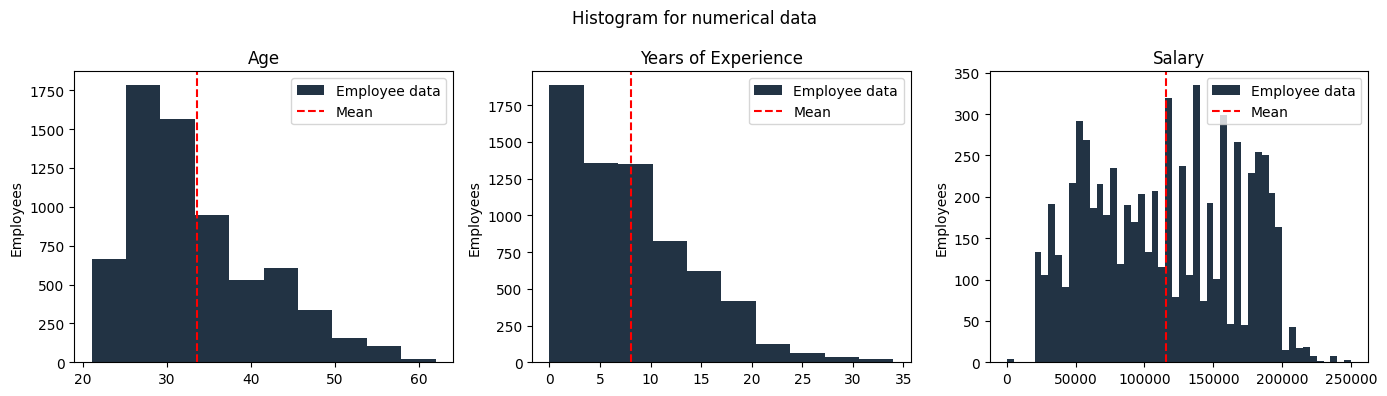

In [34]:
# Histogram for numeric variables
c=['Age', 'Years of Experience', 'Salary'] # set column names
#set up plot for 3 charts
fig, axs = plt.subplots(1,3, figsize=(14,4))
fig.suptitle('Histogram for numerical data',fontsize=12)
#set grid coordinates for subplots
#rows=[0,0,0]
cols=[0,1,2]
b=[10,10,50]
#loop through numeric data and draw histograms + indicate mean
for i in range(len(c)):
    mean = df[c[i]].mean() #get mean 
    # generate subplots and place them on predefined coordinates
    axs[cols[i]].hist(df[c[i]],bins=b[i],label="Employee data", color='#223344')
    axs[cols[i]].set_title(c[i])
    axs[cols[i]].axvline(mean, color="red", ls="--", label="Mean")
    axs[cols[i]].set_ylabel('Employees')  # Set y-axis label
    axs[cols[i]].legend()


plt.tight_layout() #keep the text from overlapping
plt.show()

# Ref get mean (ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html)
# Ref matplotlib histograms (ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
# Draw median (ref: https://python-graph-gallery.com/basic-histogram-in-matplotlib/)
# Arranging multiple subplots (ref: https://matplotlib.org/stable/users/explain/axes/arranging_axes.html)

#### Analysis of the histograms of numeric variables

+ **Age:** There is one peak on the graph, indicating that this is an unimodal histogram. With the peak showing left from the mean and most of the data tailing to the right, the histogram is right-skewed and shows clustering close to the lower age groups which in the context of the data means that the younger population is over-represented in the sample. The minimum age is 21, and the majority of individuals are likely in the younger age range.
Based on the shape a Gamma Distribution could be suitable to model the data.

+ **Years of Experience:** This histogram is quite similar to the 'Age' histogram discussed above, however it appears much more right-skewed compared with 'Age'. Clustering around lower values indicates that the majority of employees likely have fewer years of experience and there is a significant number of entry-level employees indicated by the peak around the lower end of the graph close to 0 year experience. 
The shape of the histogram would suggest a Pareto or possibly an exponential distribution model

+ **Salary:** The histogram is generated with more bins to be able to better see the shape of the data, it appears to be an unimodal histogram, vaguely resembling a bell shape.
A Normal Distribution model may be suitable to model the data.

###### A Complete Guide to Histograms (ref:https://chartio.com/learn/charts/histogram-complete-guide/)<br> Probability Distributions (ref: https://datascienceinpractice.github.io/tutorials/10-Distributions.html)<br> NumPy Random Generator (Ref: https://numpy.org/doc/stable/reference/random/generator.html)

#### Visualizing categorical data from the dataset

A bar chart is a visual representation of categorical data where bars of varying lengths represent the frequency or proportion of each category. It is chosen for visualizing categorical data because it effectively displays the distinct categories and their corresponding counts or percentages, making it easy to compare values and identify patterns in non-numeric data.

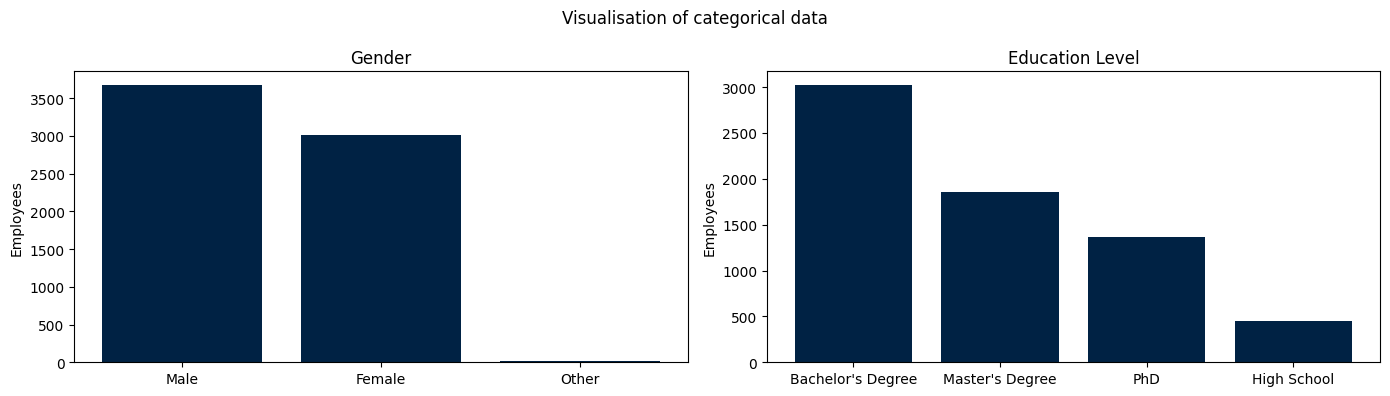

In [11]:
# Bar plots for categorical variables
c=['Gender', 'Education Level', 'Job Title'] # set column names
#set up plot for 3 charts
fig, axs = plt.subplots(1,2, figsize=(14,4))
fig.suptitle('Visualisation of categorical data',fontsize=12)
#set grid coordinates for subplots
#rows=[0,0,0]
cols=[0,1]
#loop through data and draw histograms
for i in range(2):
    # generate subplots and place them on predefined coordinates
    axs[cols[i]].bar(df[c[i]].value_counts().index, df[c[i]].value_counts(), color='#002244')
    axs[cols[i]].set_title(c[i])
    axs[cols[i]].set_ylabel('Employees')  # Set y-axis label

plt.tight_layout() #keep the text from overlapping
plt.show()

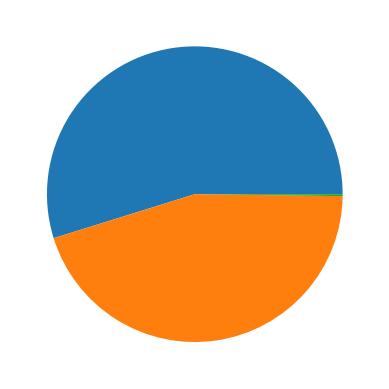

In [45]:
plt.pie(df['Gender'].value_counts())
plt.show()

(array([2177.,  742.,  250.,  596.,  213.,  371.,  107.,  115.,  102.,
        2025.]),
 array([  7.,  26.,  45.,  64.,  83., 102., 121., 140., 159., 178., 197.]),
 <BarContainer object of 10 artists>)

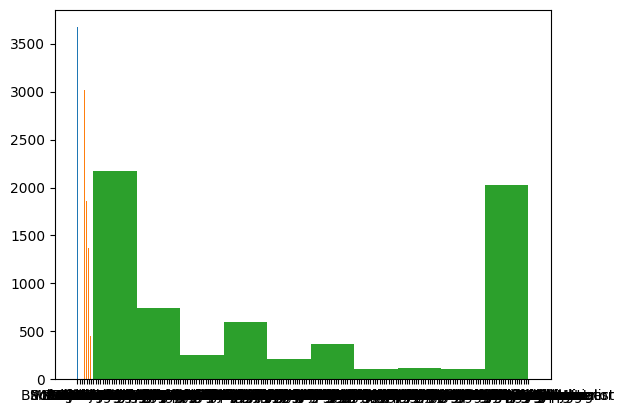

In [38]:
plt.hist(df['Gender'])
plt.hist(df['Education Level'])

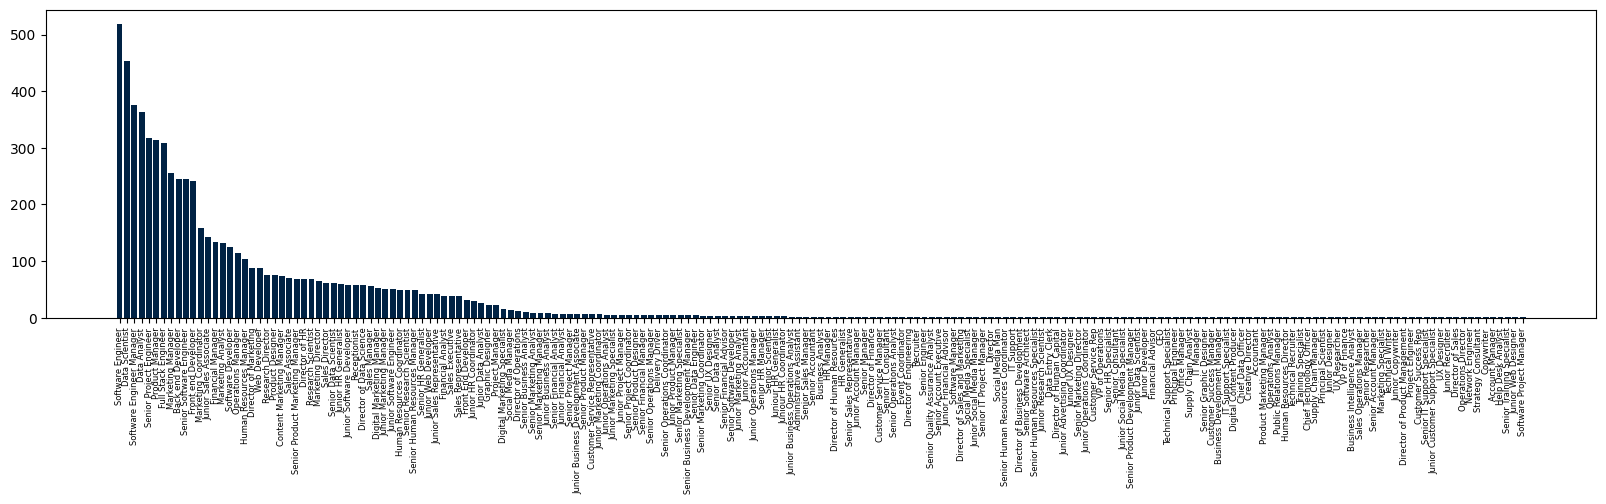

In [12]:
# generating separate plot for Job Title due to the large number of categories.
fig, axs = plt.subplots(figsize=(20,4))
plotme=df['Job Title']
plt.bar(plotme.value_counts().index, plotme.value_counts(), color='#002244')
plt.xticks(rotation=90, fontsize=6) # rotate axis labels (ref: https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels)
plt.show()

### Analysis of the bar charts of categorical data



In [13]:
import matplotlib

print(matplotlib.__version__)

3.8.2


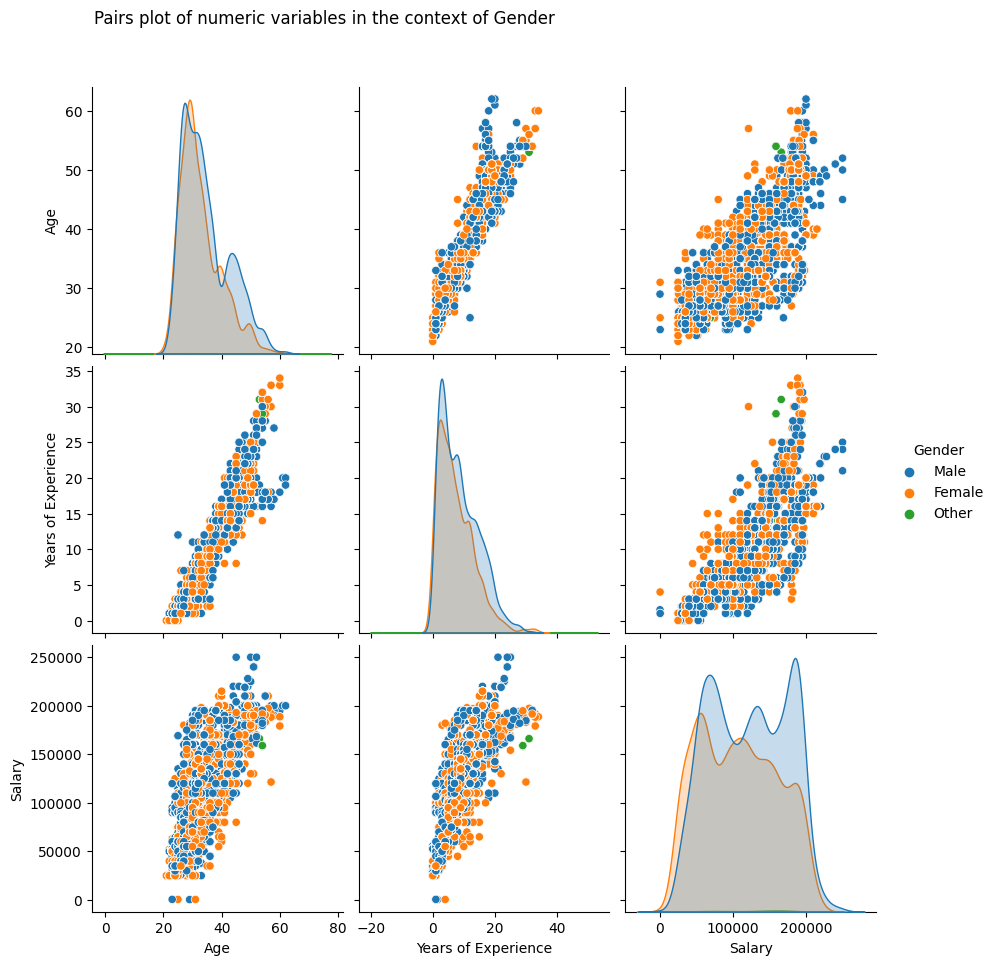

In [23]:
context='Gender'
sns.pairplot(df, hue=context, height=3)
plt.title(f"Pairs plot of numeric variables in the context of {context}", x=-1.2,y=3.3)
plt.show()

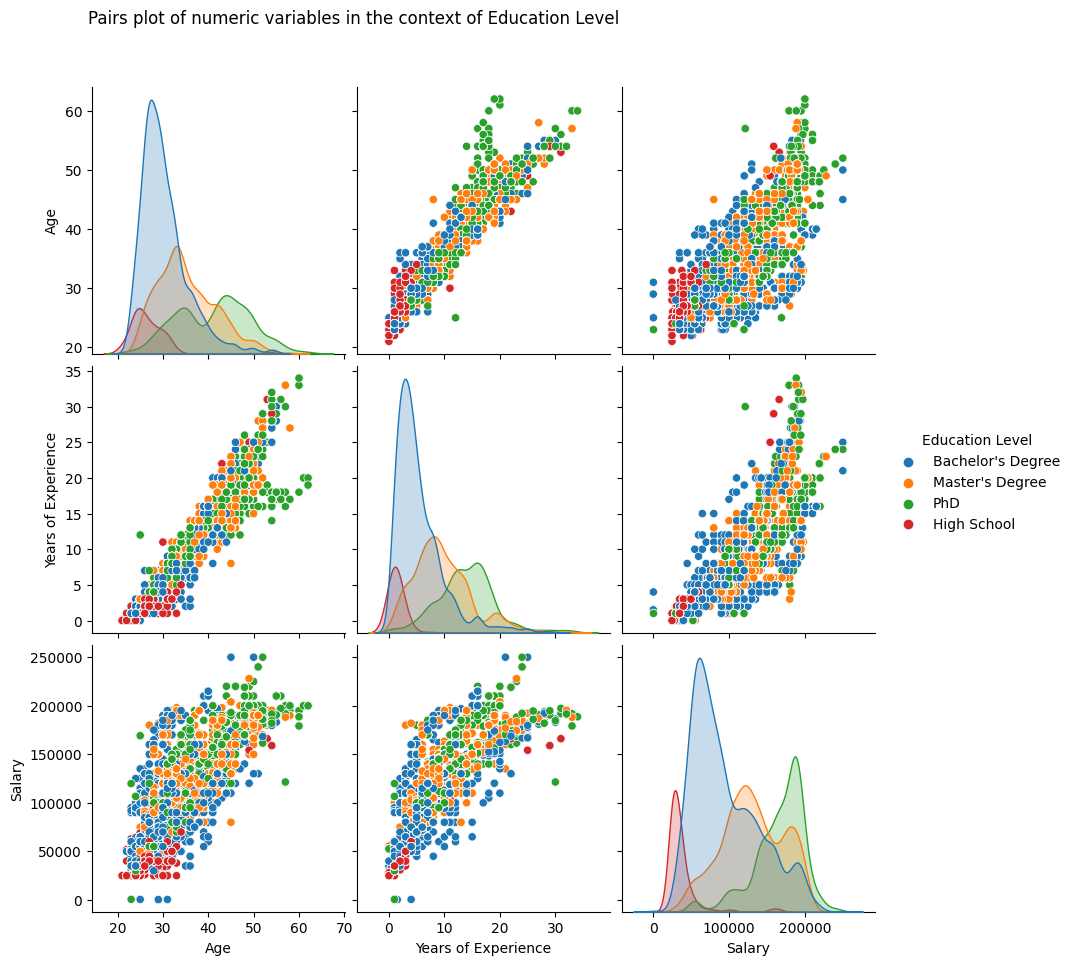

In [27]:
context='Education Level'
sns.pairplot(df, hue=context, height=3)
plt.title(f"Pairs plot of numeric variables in the context of {context}", x=-1.06,y=3.3)
plt.show()

fit random distributions to data

ref: https://datascienceinpractice.github.io/tutorials/10-Distributions.html<br>
Gamma https://medium.com/geekculture/fitting-time-to-event-to-a-gamma-distribution-model-using-python-1c76cbc7a6a#:~:text=Fit%20Data%20to%20Gamma,observations%20given%20the%20gamma%20distribution.



### Creating synthetic data for the Age variable using random distribution model

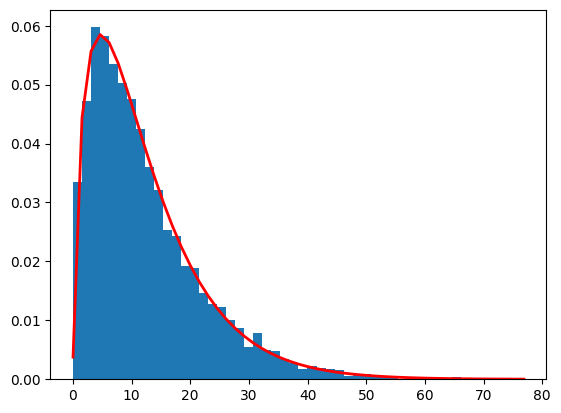

In [16]:
# age with gamma distribution 
shape, scale = df['Age'].mean()-32, df['Age'].std()  # - dirty gamma: distorted mean by -30 to fit original distribution
s = np.random.gamma(shape, scale, df['Age'].count())
#Display the histogram of the samples, along with the probability density function:

import matplotlib.pyplot as plt
import scipy.special as sps  # for drawing the curve (as per Numpy documentation)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
#NumPy.randmom.gamma (ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html)

(array([2.595e+03, 2.147e+03, 1.055e+03, 5.060e+02, 2.450e+02, 9.400e+01,
        3.200e+01, 1.300e+01, 1.000e+01, 1.000e+00]),
 array([21.02147666, 28.70725487, 36.39303308, 44.07881129, 51.7645895 ,
        59.45036771, 67.13614592, 74.82192413, 82.50770234, 90.19348055,
        97.87925876]),
 <BarContainer object of 10 artists>)

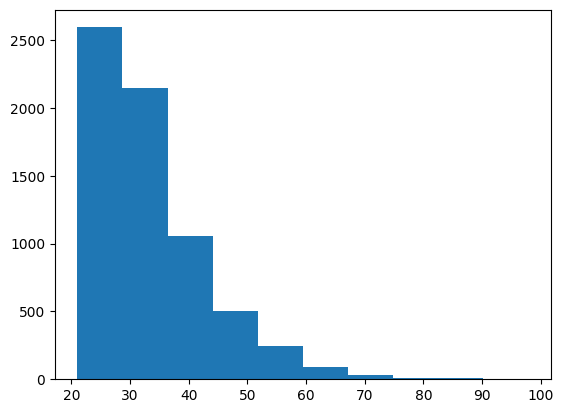

In [17]:
x=21+s
plt.hist(x) # some hits are generated over the pension age (66), this can be avoided by generating more data than the df.max and cutting off those that are over 66 - will try

(array([6.000e+00, 5.800e+01, 3.990e+02, 1.261e+03, 2.168e+03, 1.812e+03,
        7.900e+02, 1.900e+02, 1.200e+01, 2.000e+00]),
 array([-97804.22037888, -53193.29301868,  -8582.36565849,  36028.56170171,
         80639.4890619 , 125250.4164221 , 169861.34378229, 214472.27114249,
        259083.19850268, 303694.12586288, 348305.05322308]),
 <BarContainer object of 10 artists>)

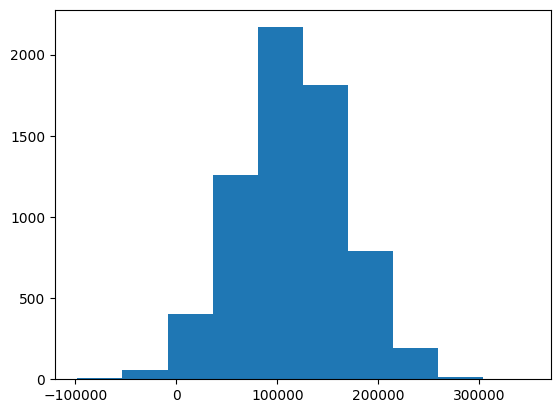

In [18]:
# salary with normal distribution
# Number of samples
samples = df['Salary'].count()
# Generate random samples from a normal distribution
mu, sigma = df['Salary'].mean(), df['Salary'].std()
rng = np.random.normal(mu, sigma, samples)
plt.hist(rng)

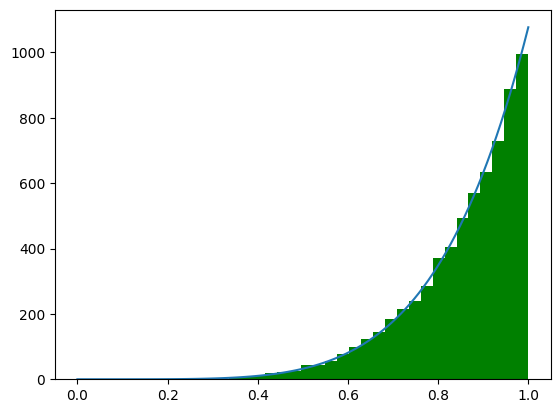

In [19]:
# Power distribution: https://numpy.org/doc/stable/reference/random/generated/numpy.random.power.html

a = df['Years of Experience'].std() # shape
samples = df['Years of Experience'].count()
s = np.random.power(a, samples)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, bins=30,color="g")
x = np.linspace(0, 1, 100)
y = a*x**(a-1.)
normed_y = samples*np.diff(bins)[0]*y
plt.plot(x, normed_y)
plt.show()

In [20]:
# Binominal distribution
# ref: # https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

#12 months, 80% chance
n, p = 12, 0.68   # n= number of trials/experiments/coins(1),
                # p= probability of each trial (50%)
rand_coins = np.random.binomial(n, p, df['Month'].count())
# coinflipping x100
# create bar plot 
fig, ax = plt.subplots(figsize=(12,4))
#count unique values in the array:
x, counts = np.unique(rand_coins, return_counts=True)
#Create bar chart
#ax.bar(x, counts)
#print(rand_coins)
plt.hist(rand_coins,bins=12)
rand_coins

KeyError: 'Month'

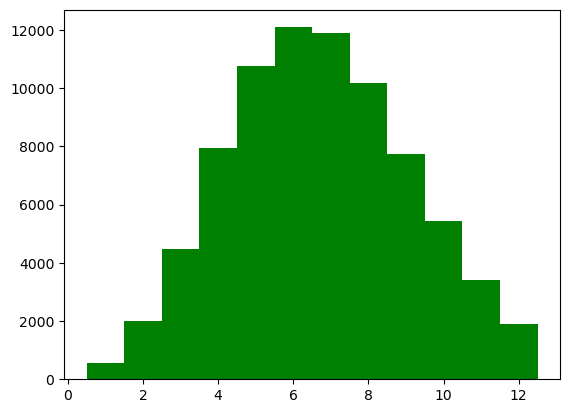

array([11, 10,  7, ...,  5,  4, 10])

In [ ]:
# model Months with Poisson ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html

# Number of samples
samples = df['Month'].count()

# Poisson distribution
lam = df['Month'].mean()  # lambda = Mean
rng = np.random.poisson(lam, samples) 

randMonths=rng

# plot
randMonths = np.sort(randMonths)
plt.hist(randMonths, bins=np.arange(1, 14) - 0.5, color='g')  
plt.show()
rng

#how to get poisson to chose lower months more often??